# Digital Holographic Refocusing
Written by Kristina Monakhova for BioE168 Fall 2017

Simple digital refocusing using a Fresnel Kernel.  You can specify the image path, system parameters, and the desired defocus distance.  This script will refocus the image for you and show you an animation of the refocusing. 

### Initializations

In [29]:
%matplotlib inline

import numpy as np   
import matplotlib.pyplot as plt            # For making figures
import numpy.fft as fft                    # FFTs
from scipy import misc
from scipy import ndimage
import myfunctions as mf

### Options

In [30]:
# Define Image paths: 
image_path = 'images/laserTarget_13.tif'
focused_path = 'images/laserTarget_0.tif'

# Options
make_video = False
determine_best_focus = False


# System parameters 
d_pix = 5.4             # um/pixel (on camera sensor)
M = 8.0                 # System magnification 
dx = d_pix/M            # um/pixel with magnification 
lmda = 0.530            # wavelength of light (um) 
k = 2.0*np.pi/lmda      # wave number 
z_defocus_guess = 495.5 # defocus (um)
zs = np.zeros(1); zs[0] = z_defocus_guess

### Read in Files and Digitally Refocus

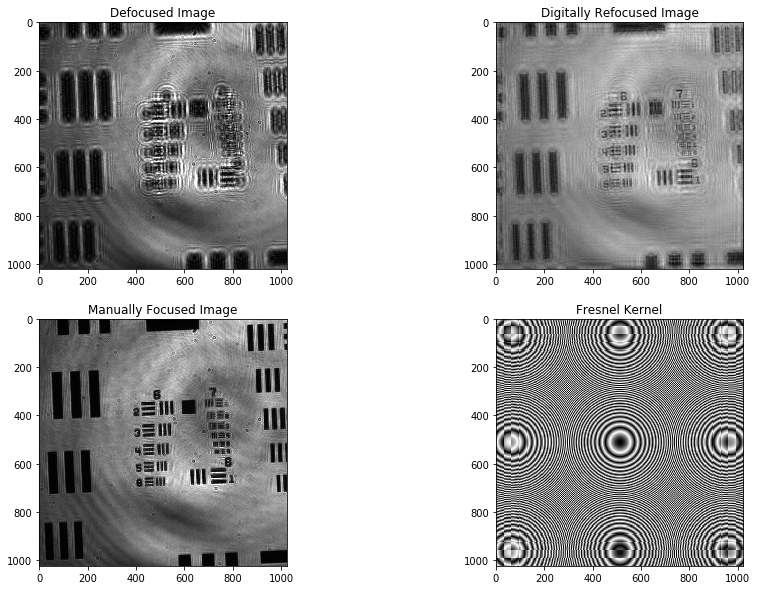

In [31]:
# Read in Images   
image = mf.rgb2gray(np.double(misc.imread(image_path)))
i_focused = mf.rgb2gray(np.double(misc.imread(focused_path)))

N_size = image.shape[0]; 
x1 = 1; y1 = 1;          # Starting index for image cropping 
i_crop = image[x1:x1+N_size,y1:y1+N_size]
i_fcrop = i_focused[x1:x1+N_size,y1:y1+N_size]
g_in = np.sqrt(i_crop)

[g_out,H, f_metric] = mf.propogate(g_in, lmda, zs, dx) # Propogate field 

    
f, axs = plt.subplots(2,2,figsize=(15,10))
plt.subplot(2,2,1); plt.imshow(i_crop, cmap='gray'); plt.title('Defocused Image');
plt.subplot(2,2,2); plt.imshow(np.abs(g_out[:,:,0]), cmap='gray'); plt.title('Digitally Refocused Image');
plt.subplot(2,2,3); plt.imshow(i_fcrop, cmap='gray'); plt.title('Manually Focused Image');
plt.subplot(2,2,4); plt.imshow(np.abs(np.angle(H[:,:,0])), cmap='gray'); plt.title('Fresnel Kernel');

In [33]:
if determine_best_focus == True:

    zs = np.arange(z_defocus_guess-75, z_defocus_guess+75, 2.0)
    [g_out,H, f_metric] = mf.propogate(g_in, lmda, zs, dx)

    plt.plot(zs, np.abs(f_metric)/np.max(np.abs(f_metric)));
    plt.title('Focus Metric');
    plt.xlabel('Decfocus distance (um)');

    print('The best focus distance is: ', zs[np.argmax(f_metric)])

## Play animation showing defocus 

In [9]:
zs = np.arange(0.0, 300.0, 50.0 )
[g_out,H, f_metric] = mf.propogate(g_in, lmda, zs, dx)
mf.interactive_slider(np.abs(g_out), 'Fresnel')

if make_video = True:
    mf.imshowAnim(np.abs(g_out), zs, g_out.shape[2], 5)